In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


In [117]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

--------------
## 새로운 시작

In [118]:
df = pd.read_csv('../../Data/송파반납대여.csv')

### 날씨 + 대기질 데이터 병합

In [119]:
# 날씨 데이터
weather = pd.read_csv('../../Data/2305~2405 날씨.csv', encoding='euc-kr')
weather.head(2)

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),전운량(10분위),시정(10m)
0,108,서울,2023-05-01 00:00,12.1,0.0,2.8,87,9,1049
1,108,서울,2023-05-01 01:00,11.6,NaN,2.9,88,6,957


In [120]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         9528 non-null   int64  
 1   지점명        9528 non-null   object 
 2   일시         9528 non-null   object 
 3   기온(°C)     9528 non-null   float64
 4   강수량(mm)    1190 non-null   float64
 5   풍속(m/s)    9460 non-null   float64
 6   습도(%)      9528 non-null   int64  
 7   전운량(10분위)  9528 non-null   int64  
 8   시정(10m)    9528 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 670.1+ KB


In [121]:
air = pd.read_csv('../../Data/airpollution_merge.csv')
air.head(2)

,지역,망,측정소코드,측정소명,SO2,CO,O3,NO2,PM10,PM25,주소,date,시간
0,서울 송파구,도시대기,111273,송파구,0.0021,0.42,0.0488,0.0126,67.0,30.0,서울 송파구 백제고분로 236,2023-05-01,1
1,서울 송파구,도시대기,111273,송파구,0.0022,0.42,0.0438,0.0129,66.0,26.0,서울 송파구 백제고분로 236,2023-05-01,2


In [122]:
# air.info()
air=air[['PM10','PM25',"date",'시간']]

In [123]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    9363 non-null   float64
 1   PM25    9385 non-null   float64
 2   date    9528 non-null   object 
 3   시간      9528 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 297.9+ KB


In [124]:
# 대기, 날씨 데이터 병합을 위해 날씨데이터 날짜 변경
weather['일시']=pd.to_datetime(weather['일시'])

In [125]:
weather['강수량(mm)'].fillna(0, inplace= True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   풍속(m/s)    9460 non-null   float64       
 6   습도(%)      9528 non-null   int64         
 7   전운량(10분위)  9528 non-null   int64         
 8   시정(10m)    9528 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 670.1+ KB


In [126]:
weather.drop('풍속(m/s)', axis=1, inplace= True)

In [127]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   습도(%)      9528 non-null   int64         
 6   전운량(10분위)  9528 non-null   int64         
 7   시정(10m)    9528 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 595.6+ KB


In [128]:
# weather['date'] = weather['일시'].dt.
weather['date']=weather['일시'].dt.date
weather['시간'] = weather['일시'].dt.hour

In [129]:
weather.head(2)

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),전운량(10분위),시정(10m),date,시간
0,108,서울,2023-05-01 00:00:00,12.1,0.0,87,9,1049,2023-05-01,0
1,108,서울,2023-05-01 01:00:00,11.6,0.0,88,6,957,2023-05-01,1


In [130]:
air.head(2)

,PM10,PM25,date,시간
0,67.0,30.0,2023-05-01,1
1,66.0,26.0,2023-05-01,2


In [131]:
air['시간']=air['시간'] - 1

In [132]:
air['시간'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [133]:
air['date']=pd.to_datetime(air['date'])

In [134]:
air.info()
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    9363 non-null   float64       
 1   PM25    9385 non-null   float64       
 2   date    9528 non-null   datetime64[ns]
 3   시간      9528 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 297.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   습도(%)      9528 non-null   int64         
 6   전운량(10분위)  9528 non-null   int64         
 7   시정(10m)    9528 non-null

In [135]:
weather['date']=pd.to_datetime(weather.date)

In [136]:
weather.info()
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   습도(%)      9528 non-null   int64         
 6   전운량(10분위)  9528 non-null   int64         
 7   시정(10m)    9528 non-null   int64         
 8   date       9528 non-null   datetime64[ns]
 9   시간         9528 non-null   int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(4), object(1)
memory usage: 707.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    9363 non-null   float64      

In [137]:
merge=pd.merge(weather, air, on=['date','시간'])
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9528 entries, 0 to 9527
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         9528 non-null   int64         
 1   지점명        9528 non-null   object        
 2   일시         9528 non-null   datetime64[ns]
 3   기온(°C)     9528 non-null   float64       
 4   강수량(mm)    9528 non-null   float64       
 5   습도(%)      9528 non-null   int64         
 6   전운량(10분위)  9528 non-null   int64         
 7   시정(10m)    9528 non-null   int64         
 8   date       9528 non-null   datetime64[ns]
 9   시간         9528 non-null   int32         
 10  PM10       9363 non-null   float64       
 11  PM25       9385 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int32(1), int64(4), object(1)
memory usage: 856.2+ KB


In [138]:
# merge.to_csv('../../Data/송파구날씨통합.csv',index=False)

----


In [139]:
weather=pd.read_csv('../../Data/송파구날씨통합.csv')

<Axes: >

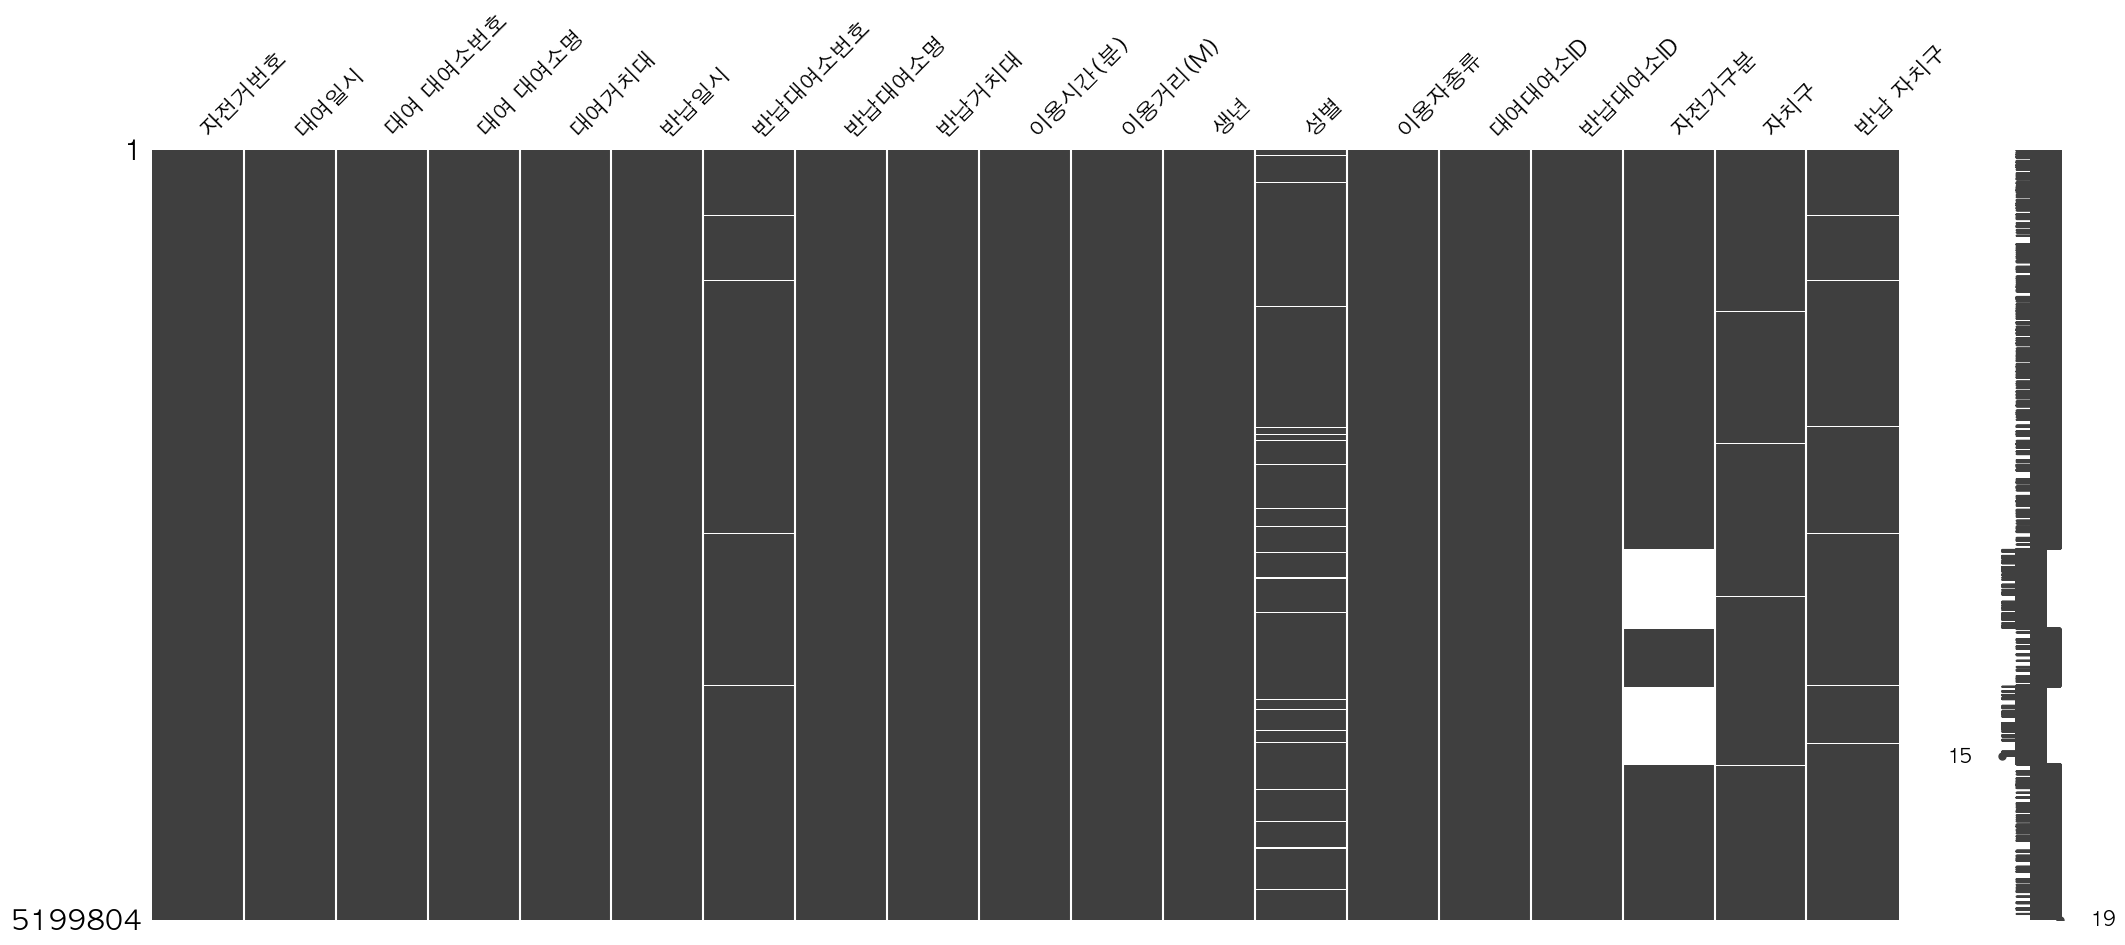

In [140]:
msno.matrix(df=df)

In [141]:
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구


In [142]:
df_return=df[['반납일시','반납대여소번호','반납대여소명','반납 자치구','반납대여소ID']]

In [143]:
df_rent=df[['대여일시','대여 대여소번호','대여 대여소명','자치구','대여대여소ID']]

In [144]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   대여일시      object
 1   대여 대여소번호  int64 
 2   대여 대여소명   object
 3   자치구       object
 4   대여대여소ID   object
dtypes: int64(1), object(4)
memory usage: 198.4+ MB


<Axes: >

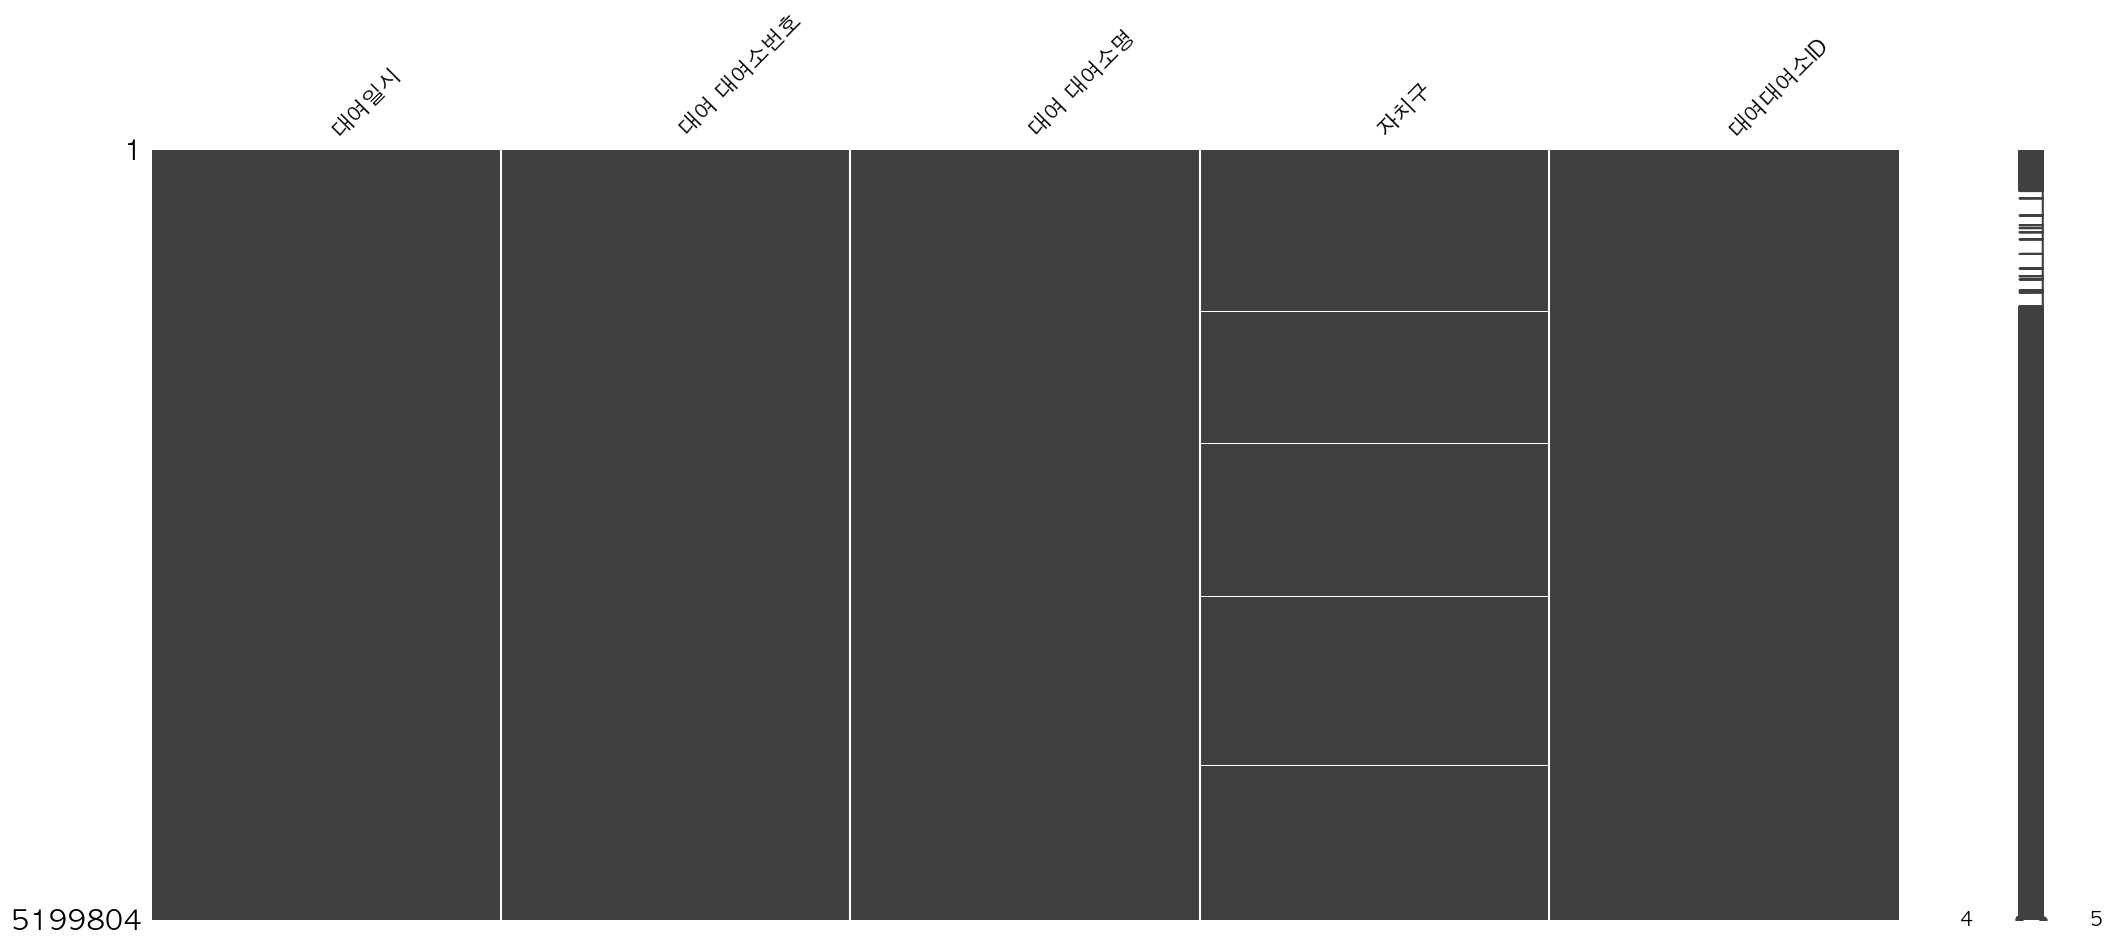

In [145]:
msno.matrix(df_rent)

> 자치구에만 nan 값 확인

In [146]:
df_info=pd.read_csv('../../Data/송파구 대여소 거치대수.csv',index_col=0)

In [147]:
df_info.reset_index(drop= True, inplace= True)

In [148]:
df_info.head(2)

,대여소 번호,대여소,자치구,상세주소,위도,경도,거치대수
0,1201,가락시장역 3번 출구,송파구,서울특별시 송파구 송파대로 지하 257,37.493179,127.118546,15.0
1,1203,밀리아나2빌딩 앞,송파구,서울특별시 송파구 송파대로28길 24,37.493729,127.120621,20.0


In [149]:
print(df_info.columns)
print(df_return.columns)
print(df_rent.columns)
df_rent.head(2)

Index(['대여소 번호', '대여소', '자치구', '상세주소', '위도', '경도', '거치대수'], dtype='object')
Index(['반납일시', '반납대여소번호', '반납대여소명', '반납 자치구', '반납대여소ID'], dtype='object')
Index(['대여일시', '대여 대여소번호', '대여 대여소명', '자치구', '대여대여소ID'], dtype='object')


,대여일시,대여 대여소번호,대여 대여소명,자치구,대여대여소ID
0,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,송파구,ST-1864
1,2024-04-01 00:03:25,1295,잠실역 8번출구,송파구,ST-1584


In [150]:
# rent  5199803
# return 5199803

df_return=pd.merge(df_return, df_info[['대여소 번호','거치대수']], left_on='반납대여소번호', right_on='대여소 번호', how='left')
df_rent=pd.merge(df_rent, df_info[['대여소 번호','거치대수']], left_on='대여 대여소번호', right_on='대여소 번호', how='left')

In [151]:
df_return.info()
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   반납일시     object 
 1   반납대여소번호  float64
 2   반납대여소명   object 
 3   반납 자치구   object 
 4   반납대여소ID  object 
 5   대여소 번호   float64
 6   거치대수     float64
dtypes: float64(3), object(4)
memory usage: 277.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199804 entries, 0 to 5199803
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   자치구       object 
 4   대여대여소ID   object 
 5   대여소 번호    float64
 6   거치대수      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 277.7+ MB


In [152]:
df_rent=df_rent[df_rent['자치구'] == '송파구']

In [153]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4523551 entries, 0 to 5199803
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   자치구       object 
 4   대여대여소ID   object 
 5   대여소 번호    float64
 6   거치대수      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 276.1+ MB


In [154]:
df_return=df_return[df_return['반납 자치구'] == '송파구']

In [155]:
df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4528110 entries, 0 to 5199803
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   반납일시     object 
 1   반납대여소번호  float64
 2   반납대여소명   object 
 3   반납 자치구   object 
 4   반납대여소ID  object 
 5   대여소 번호   float64
 6   거치대수     float64
dtypes: float64(3), object(4)
memory usage: 276.4+ MB


> 대여, 반납 분리후 송파구에 해당하는 값만 추출

<Axes: >

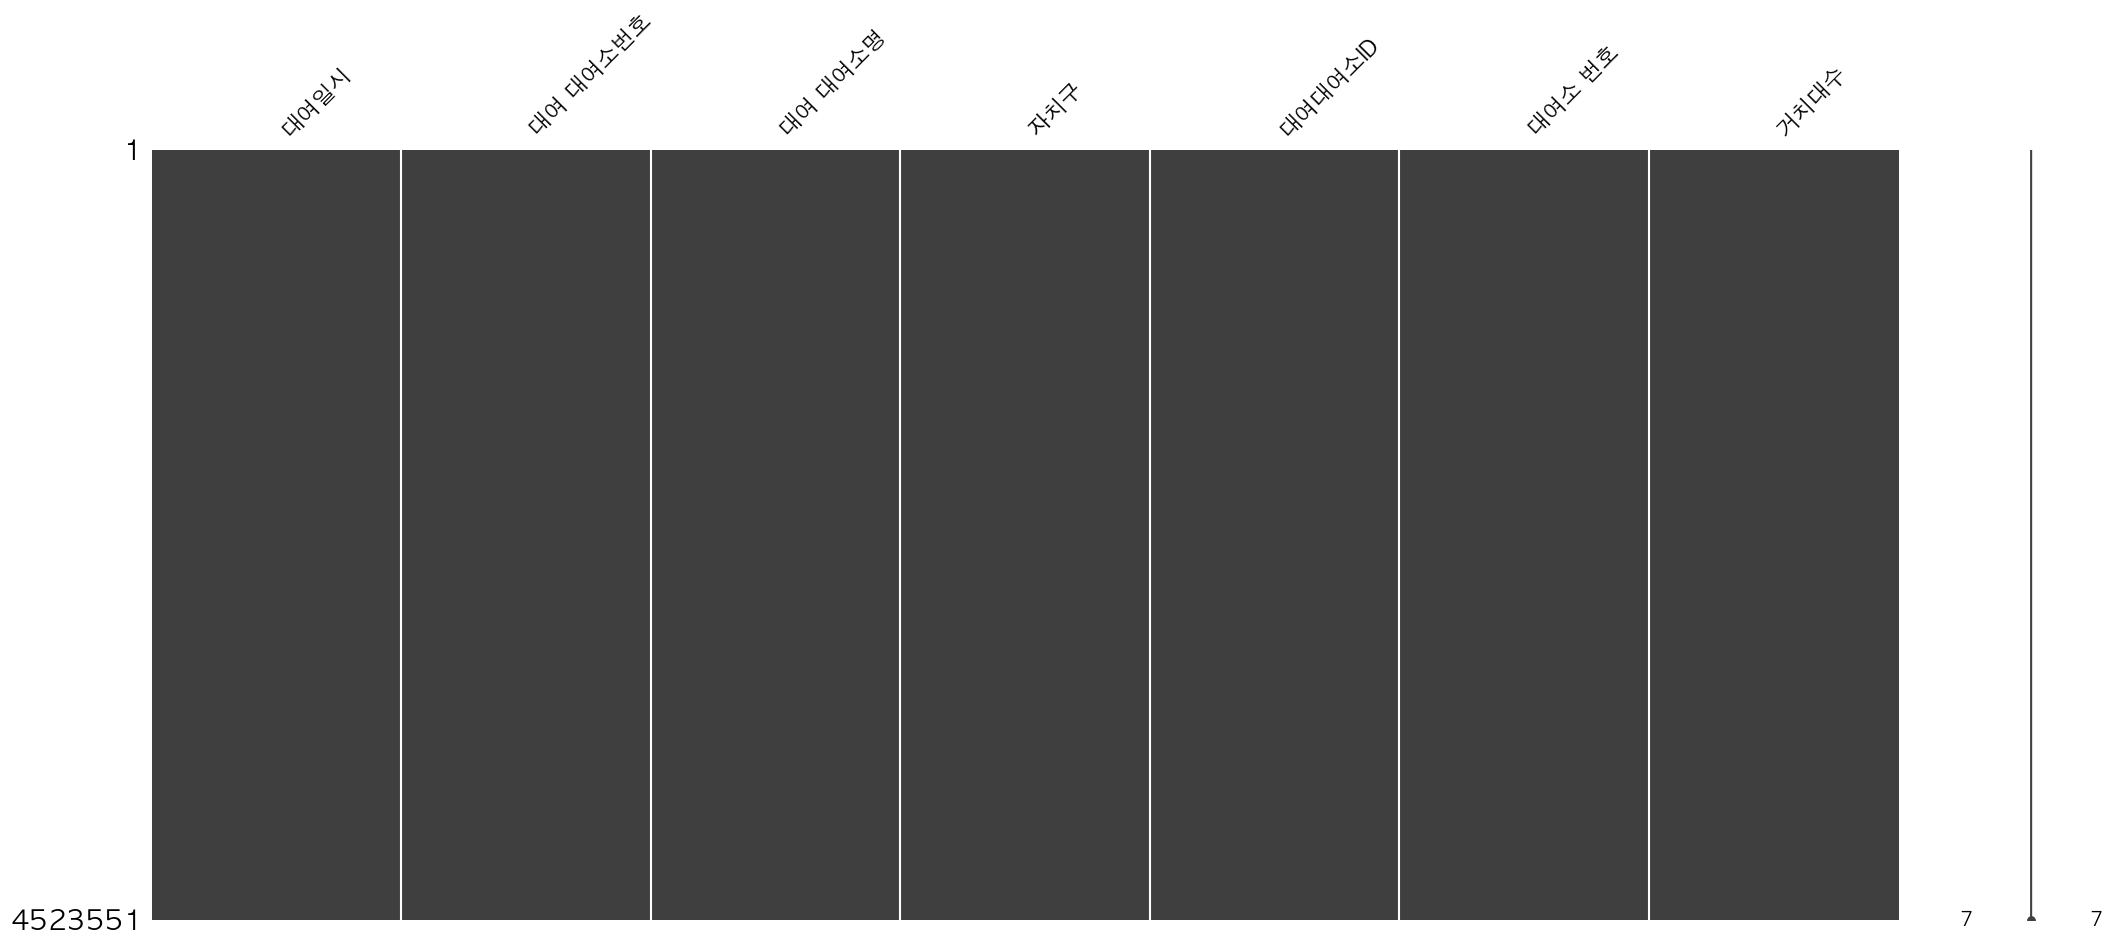

In [156]:
msno.matrix(df_rent)

<Axes: >

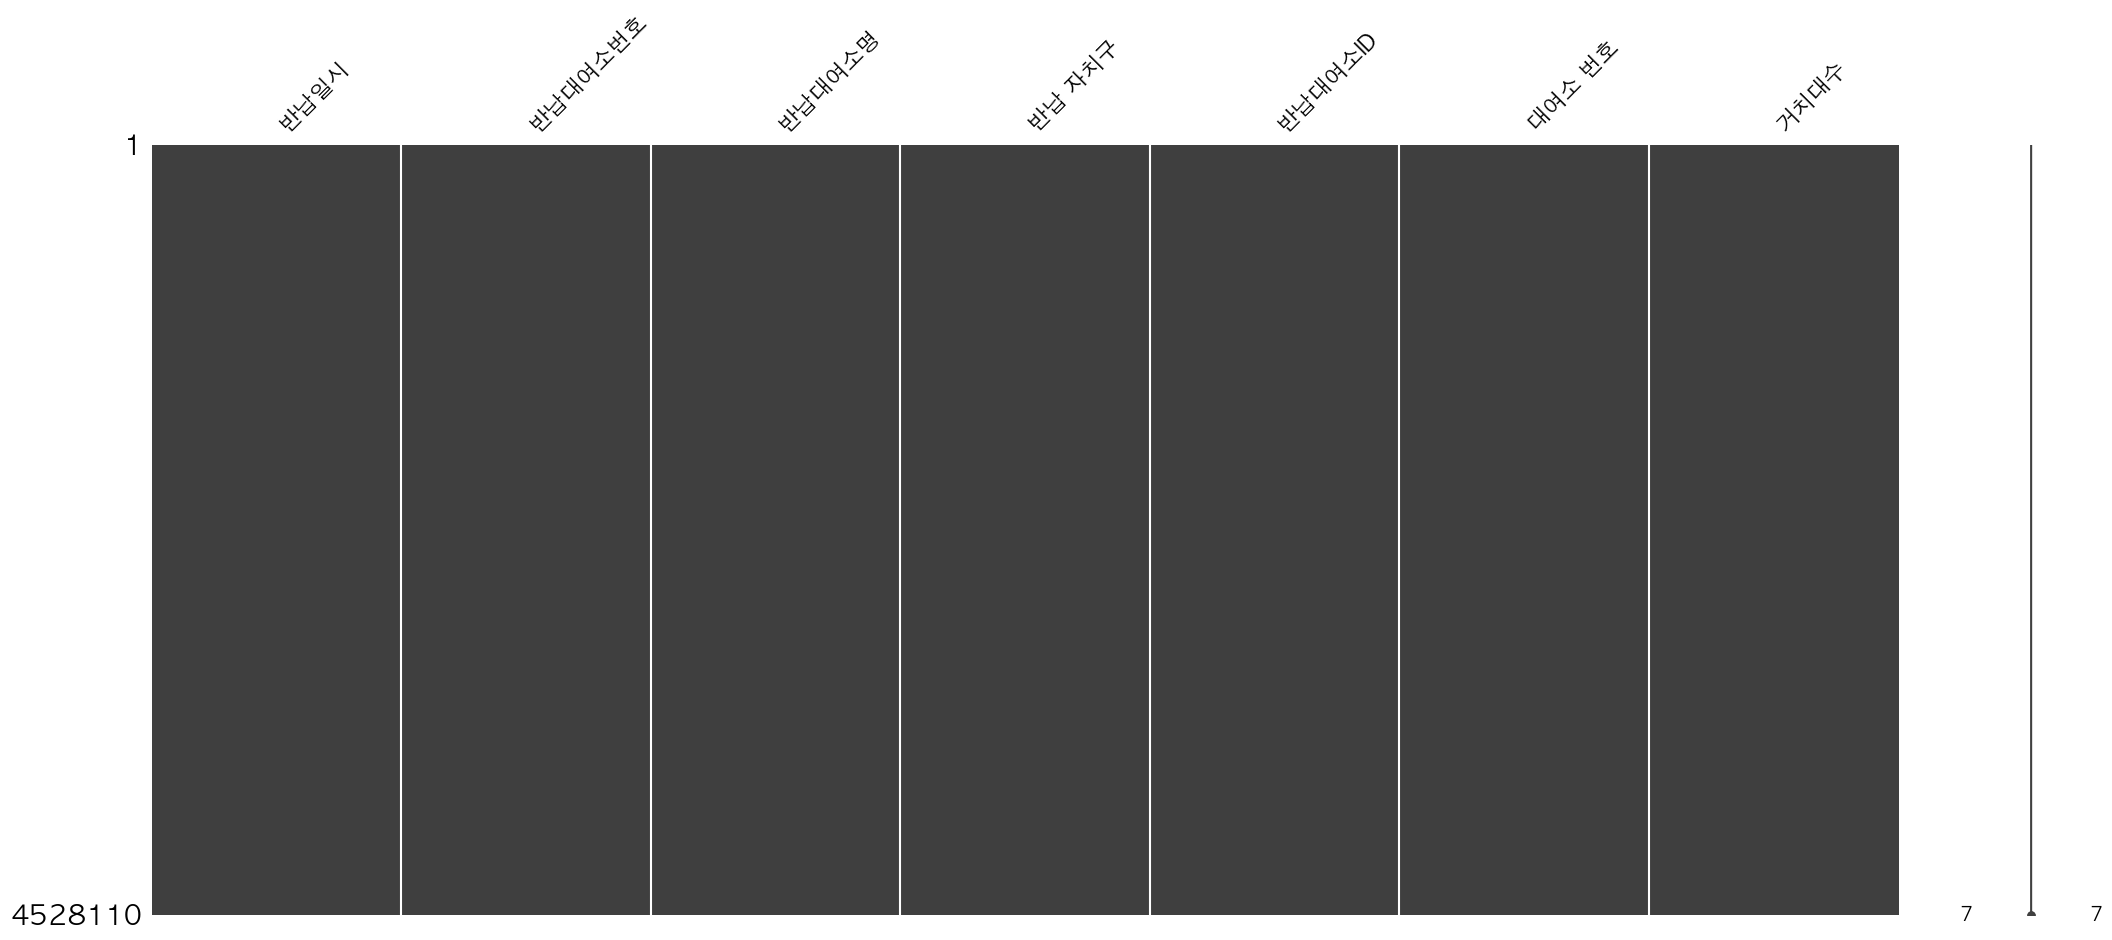

In [157]:
msno.matrix(df_return)

In [158]:
df_return.drop('대여소 번호',axis=1, inplace= True)

In [159]:
df_return.drop('반납대여소ID',axis=1, inplace= True)

In [160]:
df_return['반납일시']=pd.to_datetime(df_return['반납일시'])
df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4528110 entries, 0 to 5199803
Data columns (total 5 columns):
 #   Column   Dtype         
---  ------   -----         
 0   반납일시     datetime64[ns]
 1   반납대여소번호  float64       
 2   반납대여소명   object        
 3   반납 자치구   object        
 4   거치대수     float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 207.3+ MB


In [161]:
df_return['반납 년도']=df_return['반납일시'].dt.year
df_return['반납 월']=df_return['반납일시'].dt.month
df_return['반납 일']=df_return['반납일시'].dt.day
df_return['반납 시간']=df_return['반납일시'].dt.hour
df_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4528110 entries, 0 to 5199803
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   반납일시     datetime64[ns]
 1   반납대여소번호  float64       
 2   반납대여소명   object        
 3   반납 자치구   object        
 4   거치대수     float64       
 5   반납 년도    int32         
 6   반납 월     int32         
 7   반납 일     int32         
 8   반납 시간    int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(2)
memory usage: 276.4+ MB


In [162]:
df_rent.drop(['대여대여소ID','대여소 번호'], axis= 1, inplace= True)

In [163]:
df_rent['대여일시']=pd.to_datetime(df_rent['대여일시'])

In [164]:
df_rent['대여 년도'] = df_rent['대여일시'].dt.year
df_rent['대여 월'] = df_rent['대여일시'].dt.month
df_rent['대여 일'] = df_rent['대여일시'].dt.day
df_rent['대여 시간'] = df_rent['대여일시'].dt.hour
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4523551 entries, 0 to 5199803
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   대여일시      datetime64[ns]
 1   대여 대여소번호  int64         
 2   대여 대여소명   object        
 3   자치구       object        
 4   거치대수      float64       
 5   대여 년도     int32         
 6   대여 월      int32         
 7   대여 일      int32         
 8   대여 시간     int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1), object(2)
memory usage: 276.1+ MB


In [165]:
df_return['대여'] = True

In [166]:
df_return.head(2)

,반납일시,반납대여소번호,반납대여소명,반납 자치구,거치대수,반납 년도,반납 월,반납 일,반납 시간,대여
0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,송파구,15.0,2024,4,1,0,True
1,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,송파구,10.0,2024,4,1,0,True


In [167]:
df_rent['대여'] = False
df_rent.head(2)

,대여일시,대여 대여소번호,대여 대여소명,자치구,거치대수,대여 년도,대여 월,대여 일,대여 시간,대여
0,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,송파구,15.0,2024,4,1,0,False
1,2024-04-01 00:03:25,1295,잠실역 8번출구,송파구,25.0,2024,4,1,0,False


In [168]:
df_rent.drop('자치구',axis=1, inplace= True)
df_return.drop('반납 자치구',axis=1, inplace= True)

In [169]:
print(df_rent.columns)
print(df_return.columns)

Index(['대여일시', '대여 대여소번호', '대여 대여소명', '거치대수', '대여 년도', '대여 월', '대여 일', '대여 시간',
       '대여'],
      dtype='object')
Index(['반납일시', '반납대여소번호', '반납대여소명', '거치대수', '반납 년도', '반납 월', '반납 일', '반납 시간',
       '대여'],
      dtype='object')


In [170]:
df_return.columns = ['일시','대여소번호','대여소명','거치대수','년도','월','일','시간','대여']
df_rent.columns = ['일시','대여소번호','대여소명','거치대수','년도','월','일','시간','대여']

In [171]:
df_rent.head()
df_return

,일시,대여소번호,대여소명,거치대수,년도,월,일,시간,대여
0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,15.0,2024,4,1,0,True
1,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,10.0,2024,4,1,0,True
2,2024-04-01 00:05:08,4893.0,문정법조단지12,6.0,2024,4,1,0,True
3,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,15.0,2024,4,1,0,True
4,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,10.0,2024,4,1,0,True
...,...,...,...,...,...,...,...,...,...
5199799,2023-10-01 01:51:37,1290.0,위례송파꿈에그린아파트24단지 앞 성벽 다리 밑,10.0,2023,10,1,1,True
5199800,2023-10-01 02:11:43,4886.0,배명고등학교 건너편,6.0,2023,10,1,2,True
5199801,2023-10-01 06:08:30,1204.0,거여역 3번출구,10.0,2023,10,1,6,True
5199802,2023-10-01 08:14:07,4859.0,잠실나루 나들목,15.0,2023,10,1,8,True


In [172]:
df_rent['날짜'] = df_rent['일시'].dt.date

In [173]:
df_rent_count = df_rent.groupby(['대여소번호', '거치대수','년도', '월', '일', '시간','날짜']).size().reset_index(name='대여 갯수')


In [174]:
df_rent_count

,대여소번호,거치대수,년도,월,일,시간,날짜,대여 갯수
0,1201,15.0,2023,5,1,0,2023-05-01,3
1,1201,15.0,2023,5,1,5,2023-05-01,3
2,1201,15.0,2023,5,1,7,2023-05-01,4
3,1201,15.0,2023,5,1,8,2023-05-01,5
4,1201,15.0,2023,5,1,9,2023-05-01,4
...,...,...,...,...,...,...,...,...
1169458,5781,14.0,2024,5,31,18,2024-05-31,1
1169459,5781,14.0,2024,5,31,19,2024-05-31,10
1169460,5781,14.0,2024,5,31,20,2024-05-31,6
1169461,5781,14.0,2024,5,31,21,2024-05-31,10


In [175]:
df_rent_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169463 entries, 0 to 1169462
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여소번호   1169463 non-null  int64  
 1   거치대수    1169463 non-null  float64
 2   년도      1169463 non-null  int32  
 3   월       1169463 non-null  int32  
 4   일       1169463 non-null  int32  
 5   시간      1169463 non-null  int32  
 6   날짜      1169463 non-null  object 
 7   대여 갯수   1169463 non-null  int64  
dtypes: float64(1), int32(4), int64(2), object(1)
memory usage: 53.5+ MB


In [176]:
df_rent_count=df_rent_count[~((df_rent_count['년도'] == 2023) & (df_rent_count['월'] == 5))]


In [177]:
df_rent_count.reset_index(drop= True, inplace=True)

In [178]:
df_return['날짜'] = df_return['일시'].dt.date

In [179]:
df_return_count = df_return.groupby(['대여소번호', '거치대수','년도', '월', '일', '시간','날짜']).size().reset_index(name='반납 갯수')

In [180]:
df_return_count

,대여소번호,거치대수,년도,월,일,시간,날짜,반납 갯수
0,1201.0,15.0,2023,5,1,0,2023-05-01,2
1,1201.0,15.0,2023,5,1,1,2023-05-01,2
2,1201.0,15.0,2023,5,1,2,2023-05-01,1
3,1201.0,15.0,2023,5,1,3,2023-05-01,1
4,1201.0,15.0,2023,5,1,5,2023-05-01,2
...,...,...,...,...,...,...,...,...
1168700,5781.0,14.0,2024,5,31,18,2024-05-31,9
1168701,5781.0,14.0,2024,5,31,19,2024-05-31,7
1168702,5781.0,14.0,2024,5,31,20,2024-05-31,7
1168703,5781.0,14.0,2024,5,31,21,2024-05-31,1


In [181]:
df_return_count=df_return_count[~((df_return_count['년도'] == 2023) & (df_return_count['월'] == 5))]


In [182]:
df_rent_count.reset_index(drop= True, inplace= True)
df_rent_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071163 entries, 0 to 1071162
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여소번호   1071163 non-null  int64  
 1   거치대수    1071163 non-null  float64
 2   년도      1071163 non-null  int32  
 3   월       1071163 non-null  int32  
 4   일       1071163 non-null  int32  
 5   시간      1071163 non-null  int32  
 6   날짜      1071163 non-null  object 
 7   대여 갯수   1071163 non-null  int64  
dtypes: float64(1), int32(4), int64(2), object(1)
memory usage: 49.0+ MB


In [183]:
df_return_count.reset_index(drop= True, inplace= True)
df_return_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070495 entries, 0 to 1070494
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   대여소번호   1070495 non-null  float64
 1   거치대수    1070495 non-null  float64
 2   년도      1070495 non-null  int32  
 3   월       1070495 non-null  int32  
 4   일       1070495 non-null  int32  
 5   시간      1070495 non-null  int32  
 6   날짜      1070495 non-null  object 
 7   반납 갯수   1070495 non-null  int64  
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 49.0+ MB


In [184]:
result=pd.merge(df_rent_count, df_return_count, on=['대여소번호','거치대수','년도','월','일','시간','날짜'])

<Axes: >

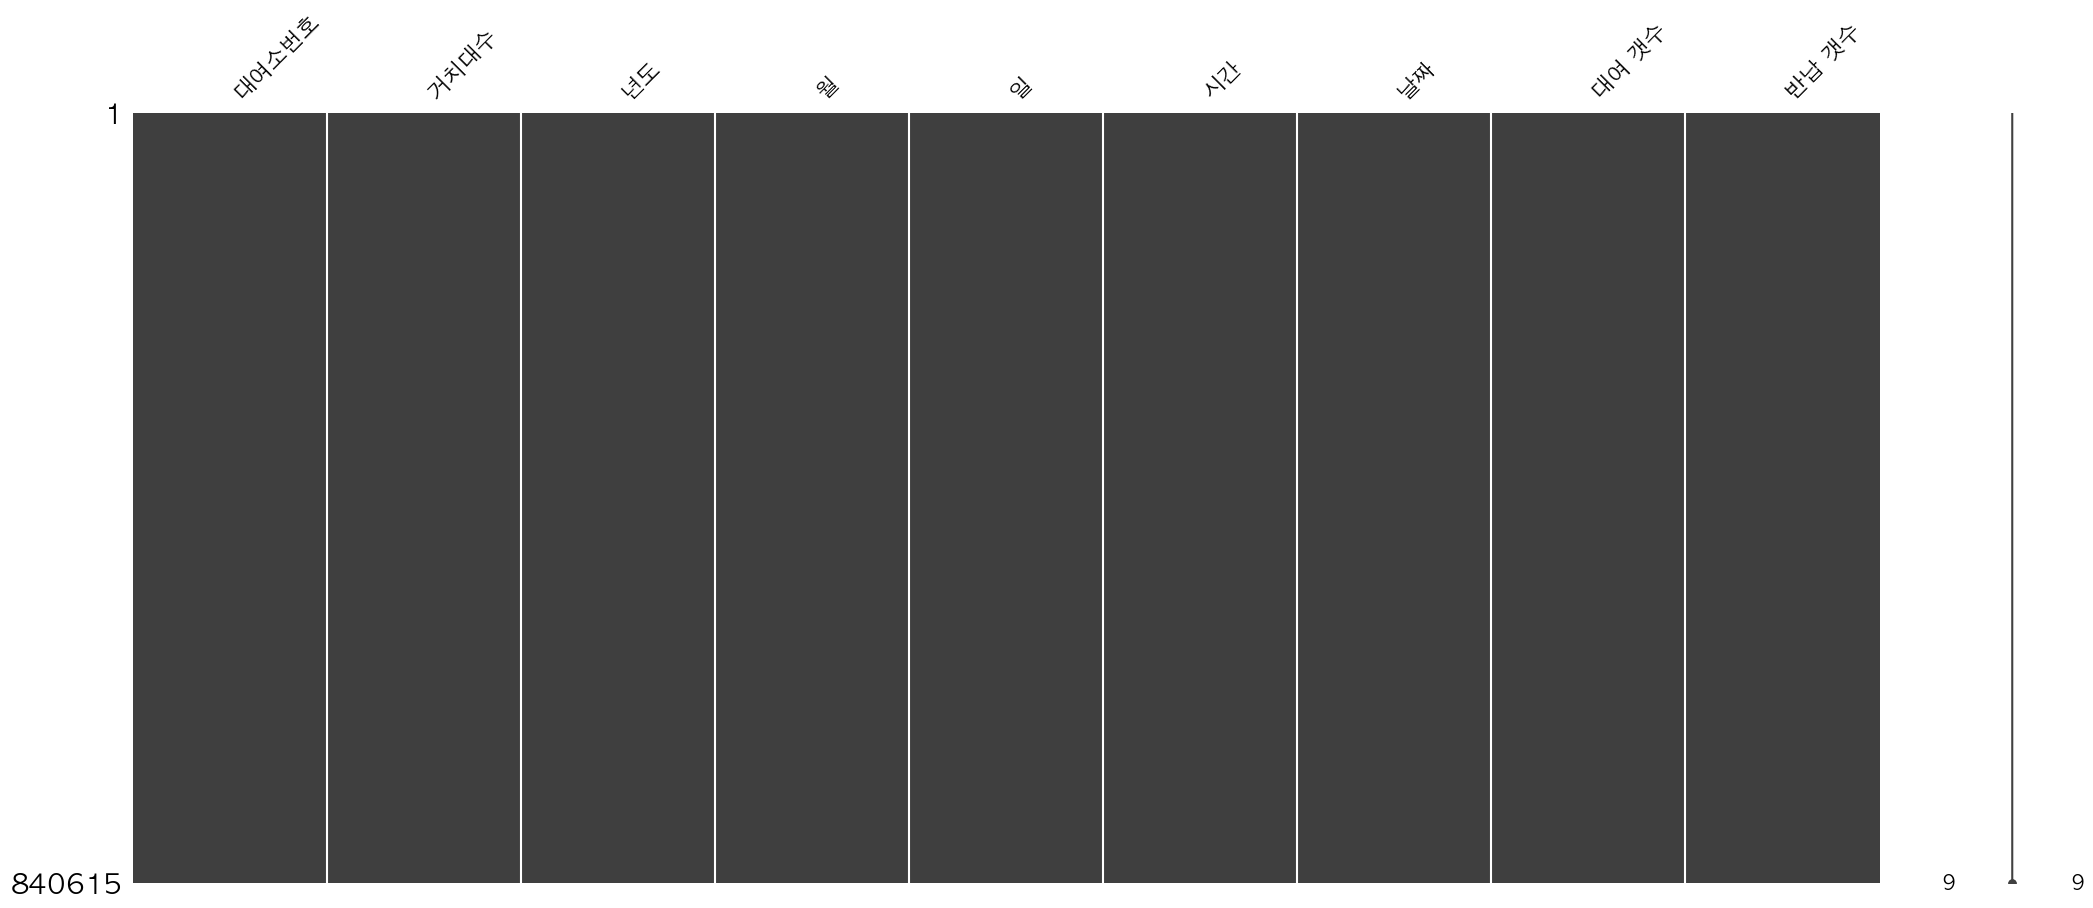

In [185]:
msno.matrix(result)

In [186]:
result['대여 갯수'].fillna(0, inplace= True)
result['반납 갯수'].fillna(0, inplace= True)

<Axes: >

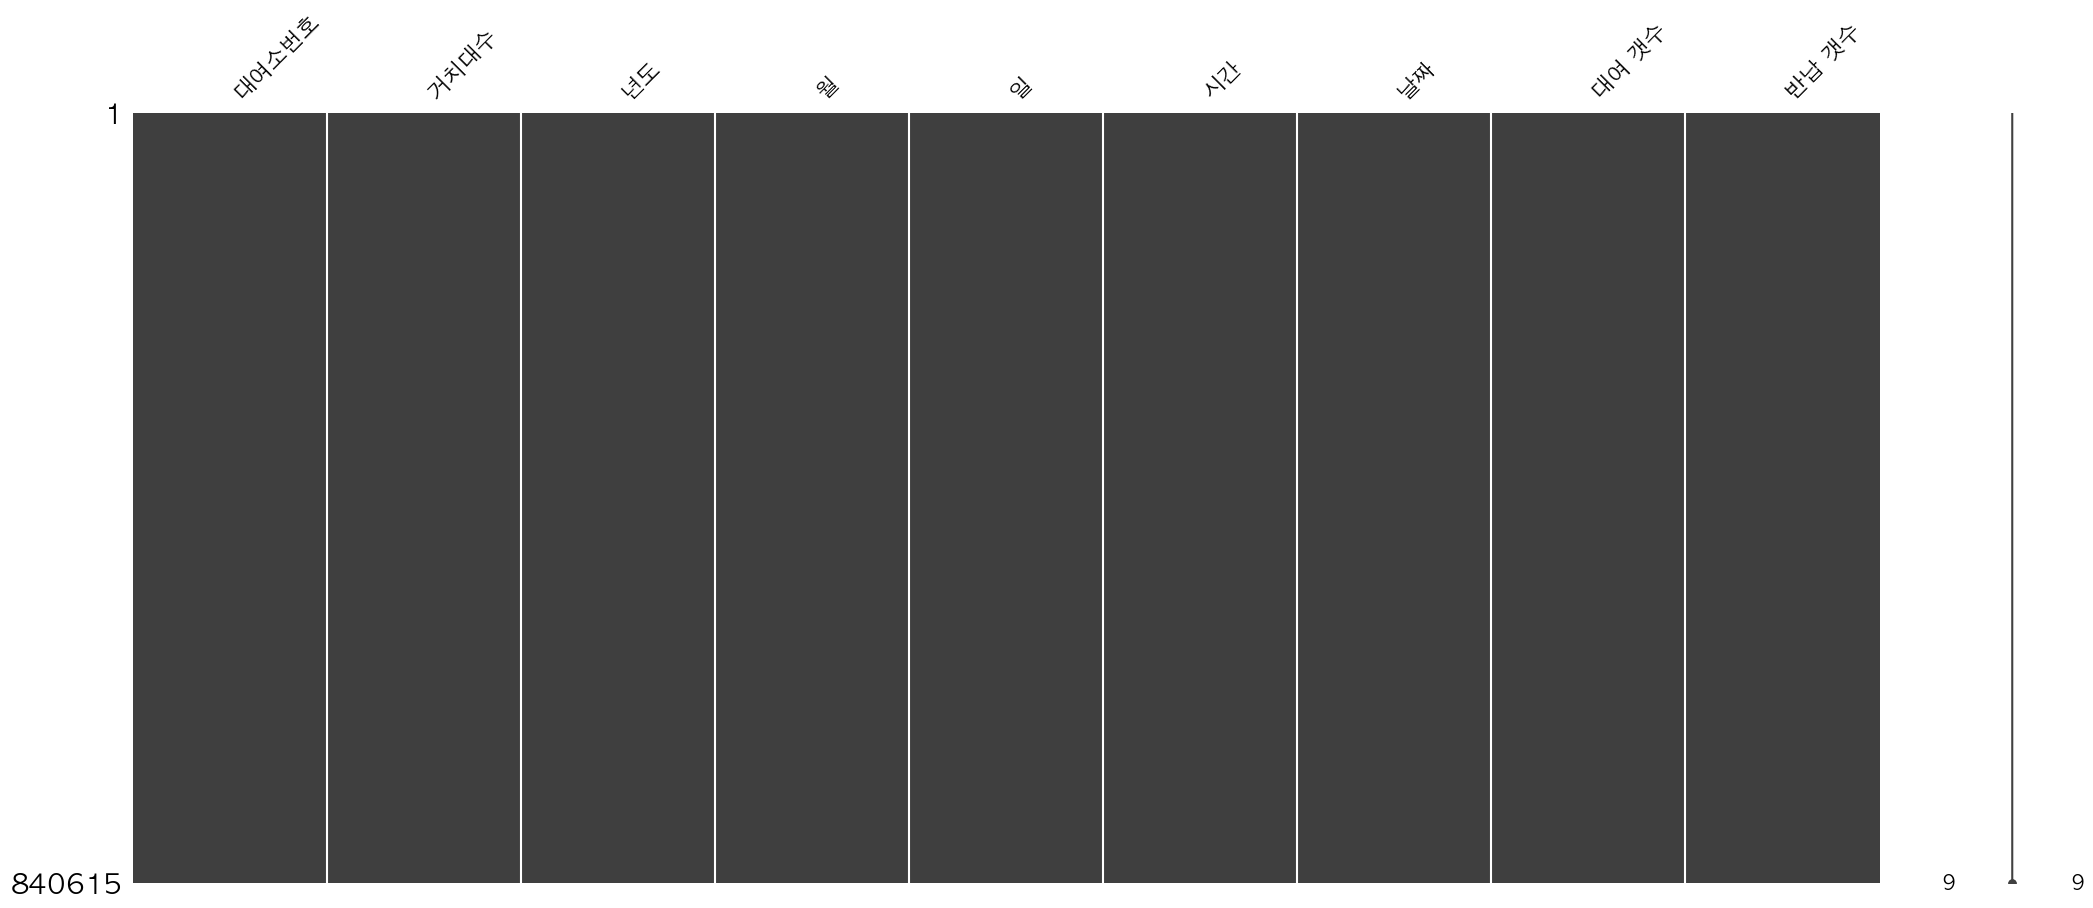

In [187]:
msno.matrix(result)

In [188]:
result.reset_index(drop=True,inplace= True)

In [189]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840615 entries, 0 to 840614
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여소번호   840615 non-null  int64  
 1   거치대수    840615 non-null  float64
 2   년도      840615 non-null  int32  
 3   월       840615 non-null  int32  
 4   일       840615 non-null  int32  
 5   시간      840615 non-null  int32  
 6   날짜      840615 non-null  object 
 7   대여 갯수   840615 non-null  int64  
 8   반납 갯수   840615 non-null  int64  
dtypes: float64(1), int32(4), int64(3), object(1)
memory usage: 44.9+ MB


In [190]:
result['날짜']=pd.to_datetime(result['날짜'])

<Axes: xlabel='대여소번호'>

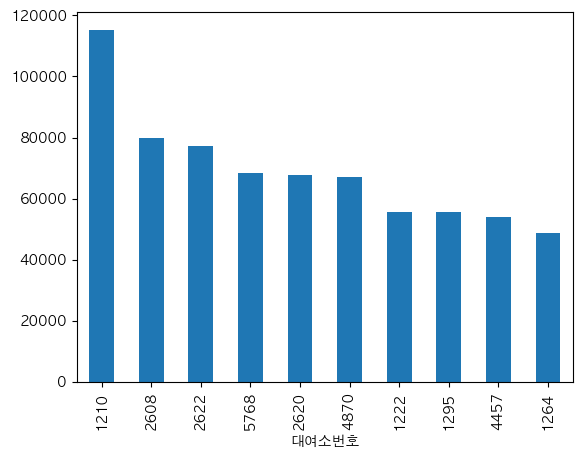

In [191]:
(result.groupby('대여소번호')['대여 갯수'].sum().sort_values(ascending=False))[:10].plot(kind='bar')

In [192]:
df_info=df_info[['대여소 번호','대여소']]

In [193]:
result=pd.merge(result, df_info , left_on='대여소번호', right_on='대여소 번호', how='left')

In [194]:
result

,대여소번호,거치대수,년도,월,일,시간,날짜,대여 갯수,반납 갯수,대여소 번호,대여소
0,1201,15.0,2023,6,1,0,2023-06-01,6,6,1201,가락시장역 3번 출구
1,1201,15.0,2023,6,1,1,2023-06-01,6,12,1201,가락시장역 3번 출구
2,1201,15.0,2023,6,1,2,2023-06-01,8,5,1201,가락시장역 3번 출구
3,1201,15.0,2023,6,1,3,2023-06-01,6,5,1201,가락시장역 3번 출구
4,1201,15.0,2023,6,1,5,2023-06-01,1,2,1201,가락시장역 3번 출구
...,...,...,...,...,...,...,...,...,...,...,...
840610,5781,14.0,2024,5,31,18,2024-05-31,1,9,5781,올림픽공원 수영장
840611,5781,14.0,2024,5,31,19,2024-05-31,10,7,5781,올림픽공원 수영장
840612,5781,14.0,2024,5,31,20,2024-05-31,6,7,5781,올림픽공원 수영장
840613,5781,14.0,2024,5,31,21,2024-05-31,10,1,5781,올림픽공원 수영장


<Axes: xlabel='대여소'>

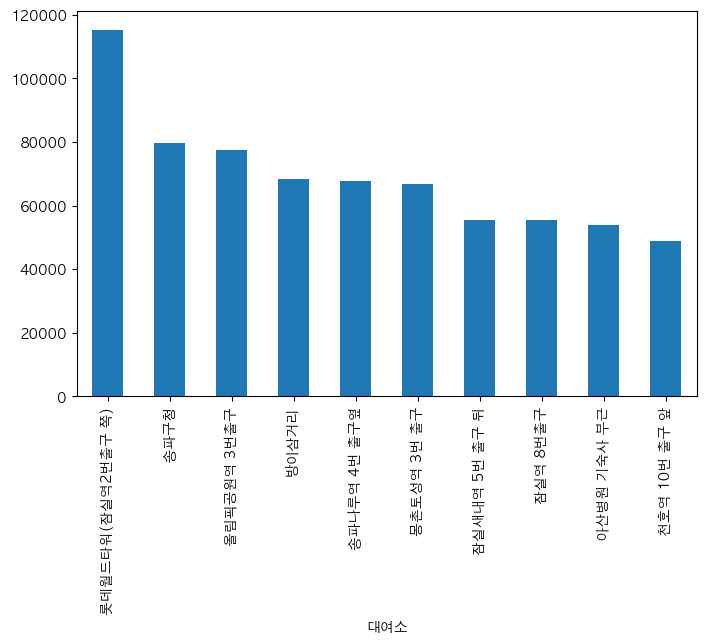

In [195]:
plt.figure(figsize=(8,5))
(result.groupby('대여소')['대여 갯수'].sum().sort_values(ascending=False))[:10].plot(kind='bar')

In [196]:
result[result['대여소'] == '롯데월드타워(잠실역2번출구 쪽)']

,대여소번호,거치대수,년도,월,일,시간,날짜,대여 갯수,반납 갯수,대여소 번호,대여소
40291,1210,30.0,2023,6,1,0,2023-06-01,2,2,1210,롯데월드타워(잠실역2번출구 쪽)
40292,1210,30.0,2023,6,1,6,2023-06-01,2,11,1210,롯데월드타워(잠실역2번출구 쪽)
40293,1210,30.0,2023,6,1,7,2023-06-01,9,26,1210,롯데월드타워(잠실역2번출구 쪽)
40294,1210,30.0,2023,6,1,8,2023-06-01,41,68,1210,롯데월드타워(잠실역2번출구 쪽)
40295,1210,30.0,2023,6,1,9,2023-06-01,22,51,1210,롯데월드타워(잠실역2번출구 쪽)
...,...,...,...,...,...,...,...,...,...,...,...
47071,1210,30.0,2024,5,31,19,2024-05-31,29,27,1210,롯데월드타워(잠실역2번출구 쪽)
47072,1210,30.0,2024,5,31,20,2024-05-31,27,25,1210,롯데월드타워(잠실역2번출구 쪽)
47073,1210,30.0,2024,5,31,21,2024-05-31,19,18,1210,롯데월드타워(잠실역2번출구 쪽)
47074,1210,30.0,2024,5,31,22,2024-05-31,8,10,1210,롯데월드타워(잠실역2번출구 쪽)


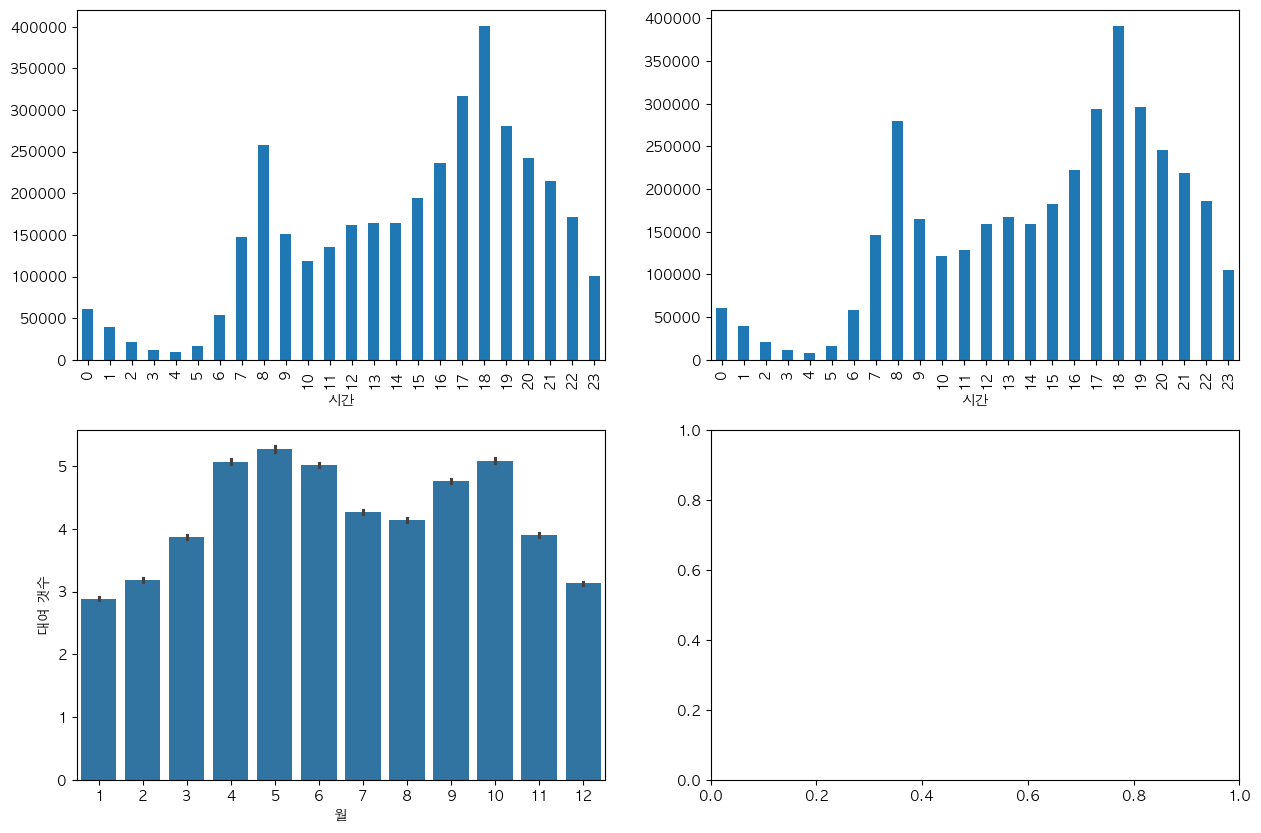

In [197]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
(result.groupby('시간')['대여 갯수'].sum()).plot(kind='bar', ax=ax1)
(result.groupby('시간')['반납 갯수'].sum()).plot(kind='bar', ax=ax2)
sns.barplot(x='월',y='대여 갯수', data=result, ax=ax3)

plt.show()

In [198]:
result.drop('대여소 번호',axis=1, inplace= True)

In [225]:
gu=result[result['대여소'] == ' 송파구청']

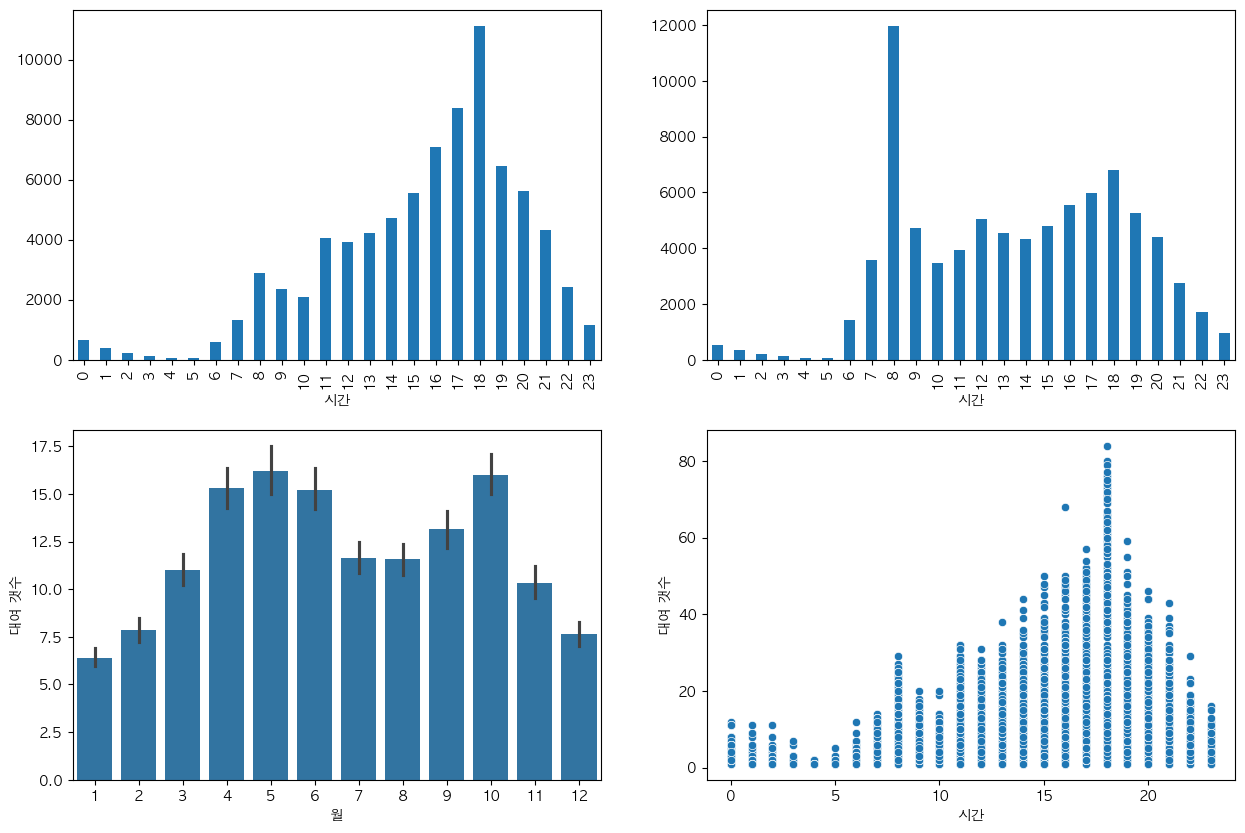

In [226]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
(gu.groupby('시간')['대여 갯수'].sum()).plot(kind='bar', ax=ax1)
(gu.groupby('시간')['반납 갯수'].sum()).plot(kind='bar', ax=ax2)
sns.barplot(x='월',y='대여 갯수', data=gu, ax=ax3)
sns.scatterplot(
    x='시간',
    y='대여 갯수',
    data=gu
)

plt.show()

In [227]:
olympic=result[result['대여소'] =='올림픽공원역 3번출구']

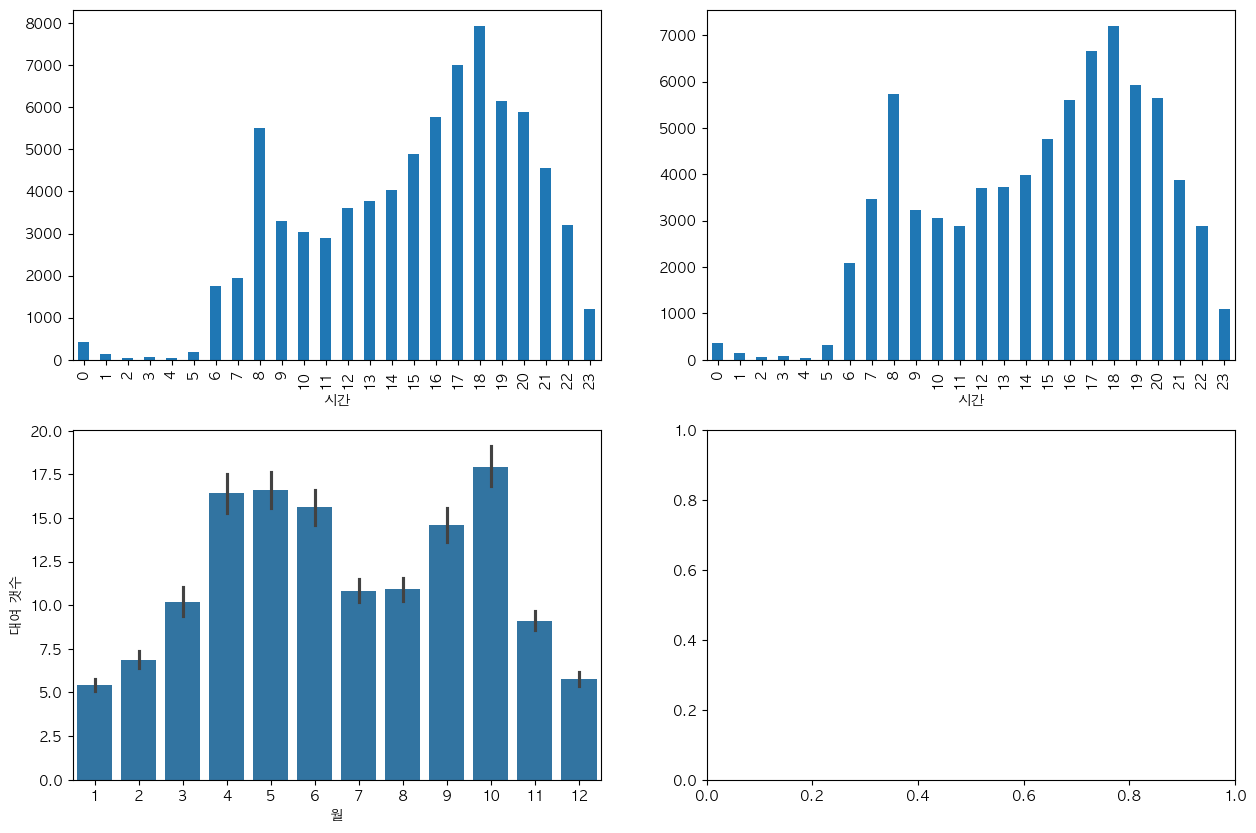

In [228]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
(olympic.groupby('시간')['대여 갯수'].sum()).plot(kind='bar', ax=ax1)
(olympic.groupby('시간')['반납 갯수'].sum()).plot(kind='bar', ax=ax2)
sns.barplot(x='월',y='대여 갯수', data=olympic, ax=ax3)

plt.show()

In [229]:
jamsil5=result[result['대여소'] == '잠실새내역 5번 출구 뒤']

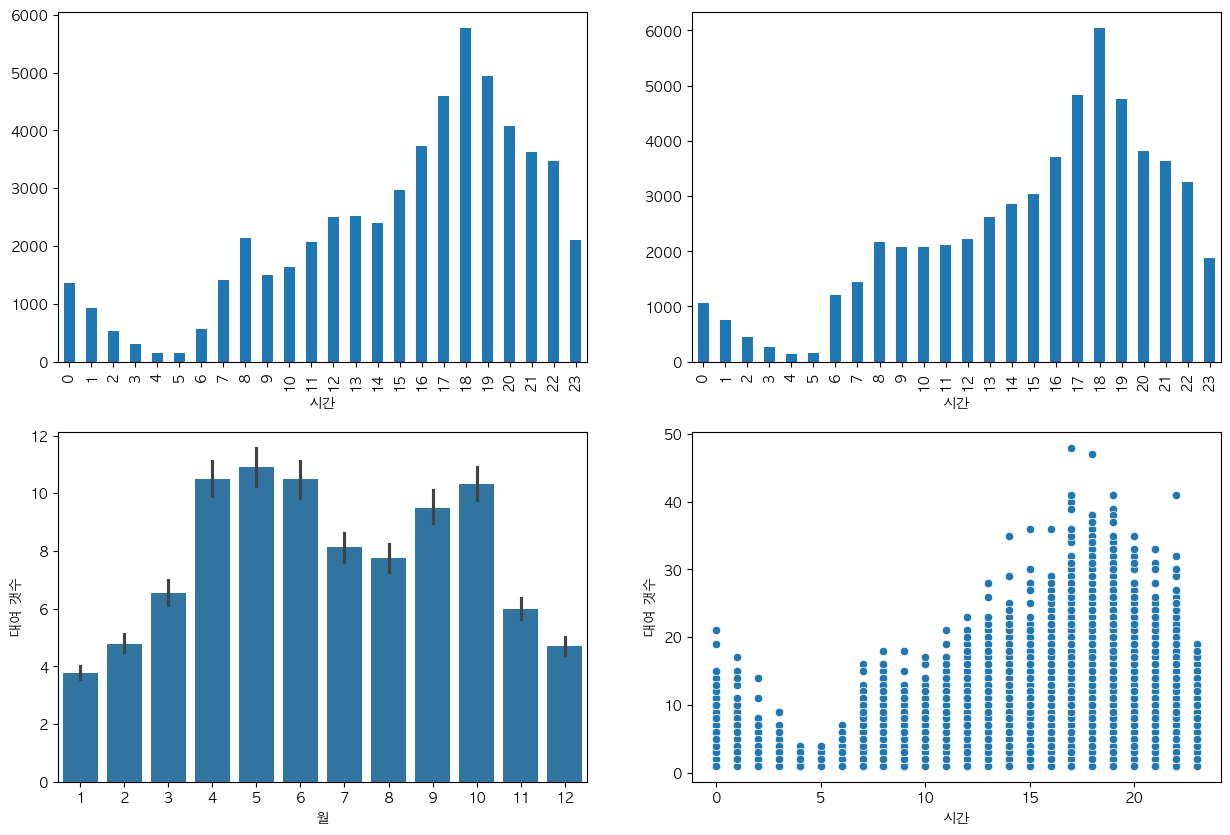

In [257]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
(jamsil5.groupby('시간')['대여 갯수'].sum()).plot(kind='bar', ax=ax1)
(jamsil5.groupby('시간')['반납 갯수'].sum()).plot(kind='bar', ax=ax2)
sns.barplot(x='월',y='대여 갯수', data=jamsil5, ax=ax3)
sns.scatterplot(x='시간',  y='대여 갯수', data= jamsil5, ax=ax4)

plt.show()

In [231]:
songpa4=result[result['대여소'] == '송파나루역 4번 출구옆']

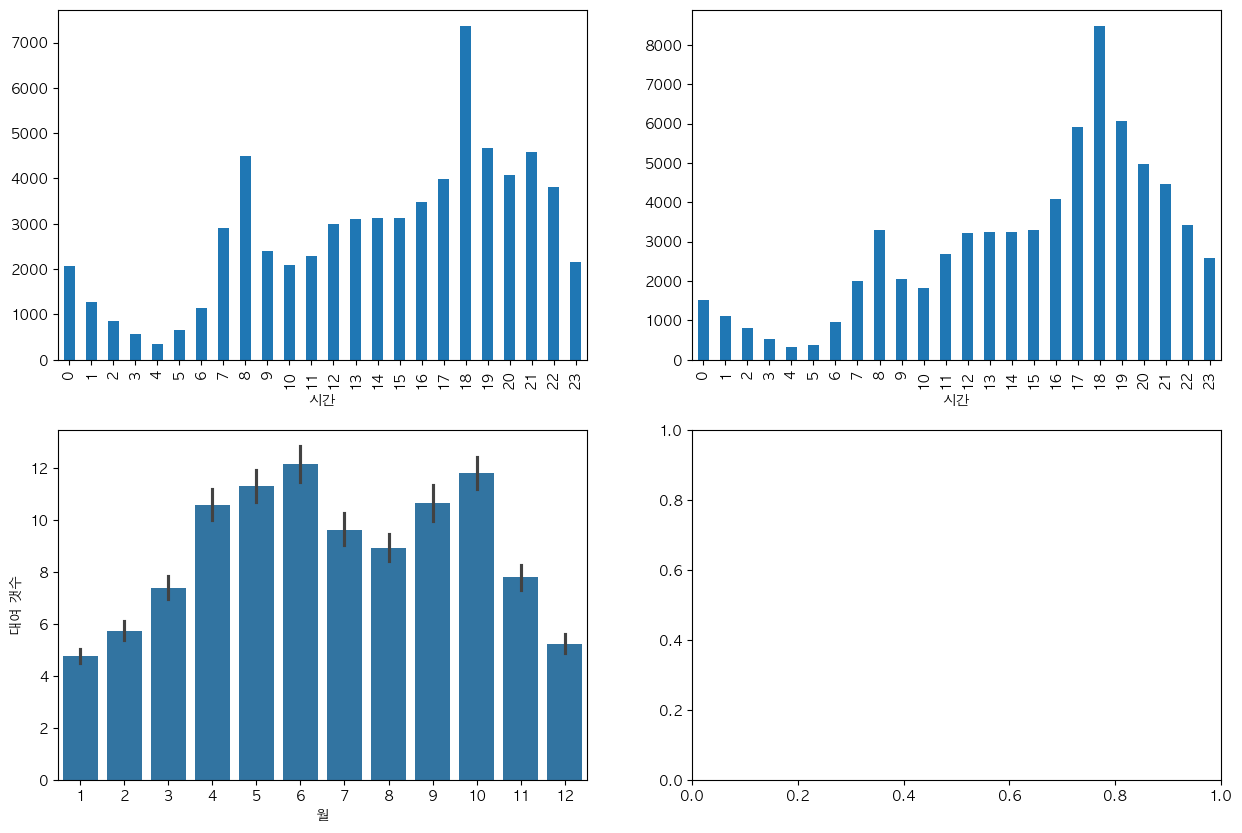

In [232]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
(songpa4.groupby('시간')['대여 갯수'].sum()).plot(kind='bar', ax=ax1)
(songpa4.groupby('시간')['반납 갯수'].sum()).plot(kind='bar', ax=ax2)
sns.barplot(x='월',y='대여 갯수', data=songpa4, ax=ax3)

plt.show()

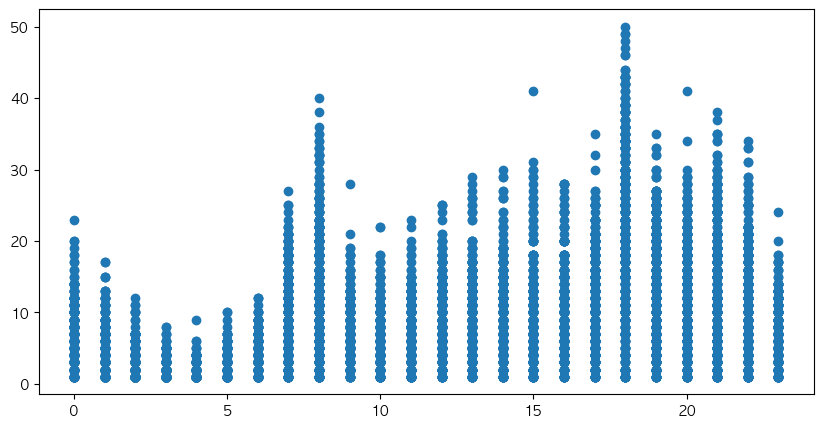

In [233]:
plt.figure(figsize=(10,5))
plt.scatter(
    x='시간',
    y = '대여 갯수',
    data=songpa4
)

In [235]:
jam=result[result['대여소'] == '잠실역 8번출구']

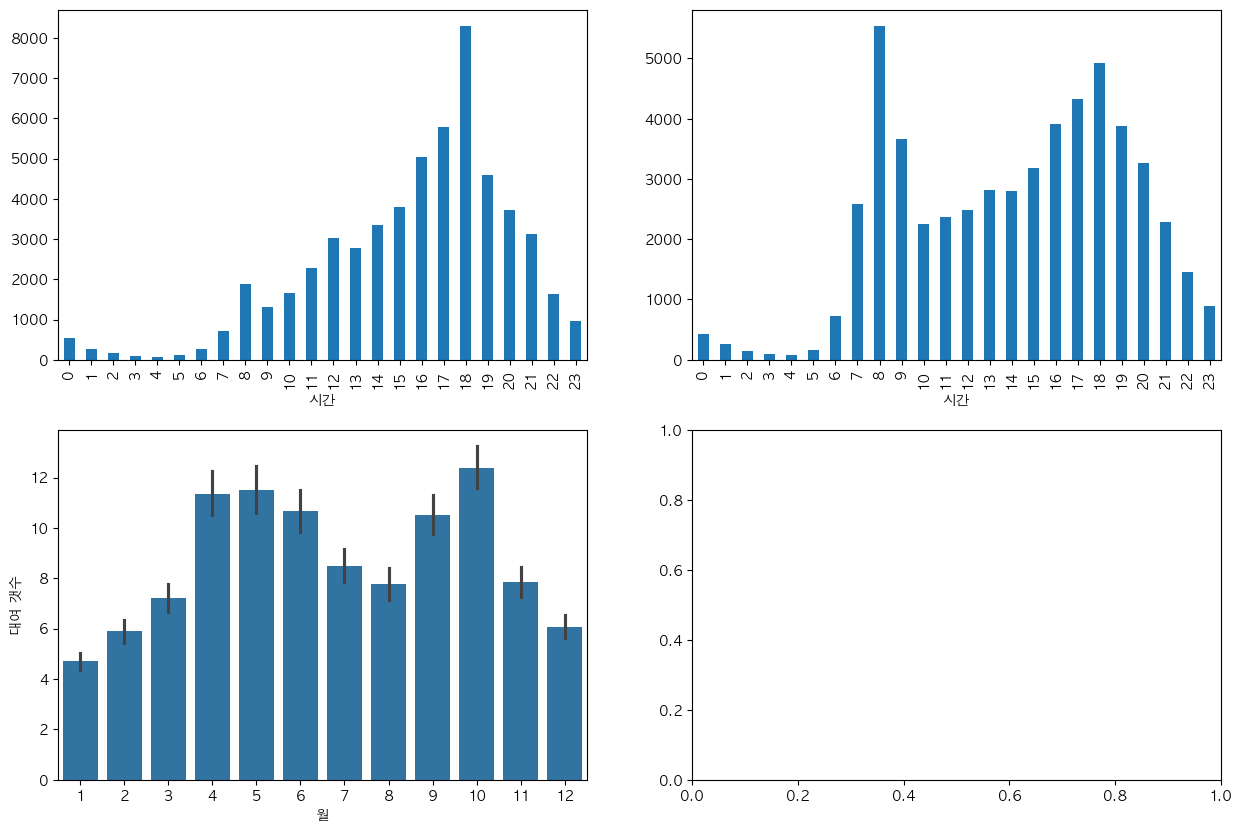

In [237]:
fig = plt.figure(figsize=(15,10))
ax1= fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
(jam.groupby('시간')['대여 갯수'].sum()).plot(kind='bar', ax=ax1)
(jam.groupby('시간')['반납 갯수'].sum()).plot(kind='bar', ax=ax2)
sns.barplot(x='월',y='대여 갯수', data=jam, ax=ax3)

plt.show()

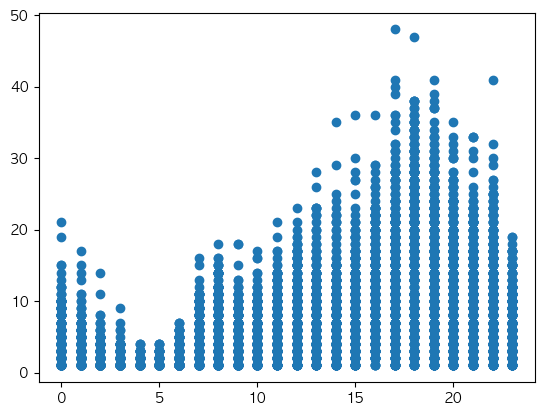

In [260]:
plt.scatter(
    y='대여 갯수',
    x='시간',
    data=jamsil5
)

<Axes: >

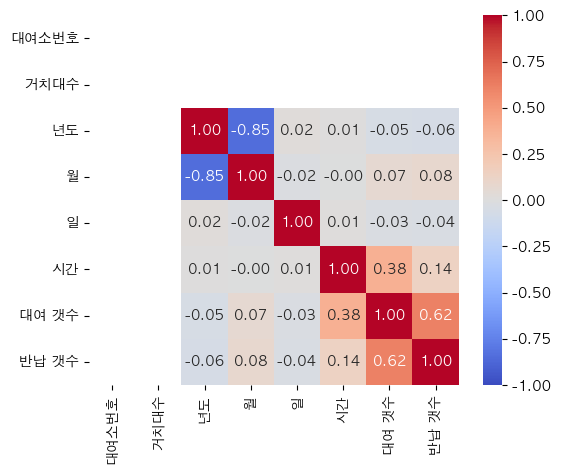

In [ ]:
sns.heatmap(gu.corr(numeric_only=True),
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ) 

<Axes: >

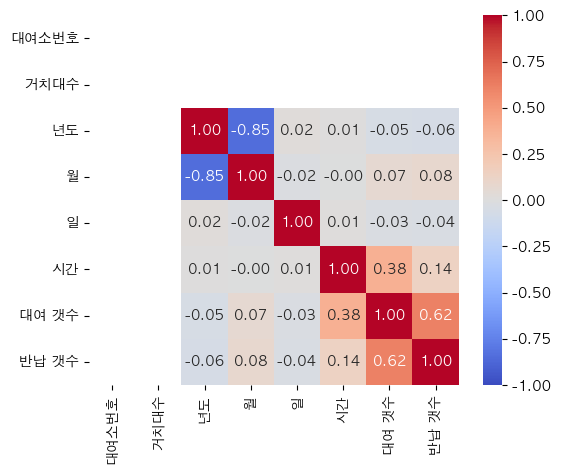

In [253]:
sns.heatmap(jam.corr(numeric_only=True),
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ) 

<Axes: >

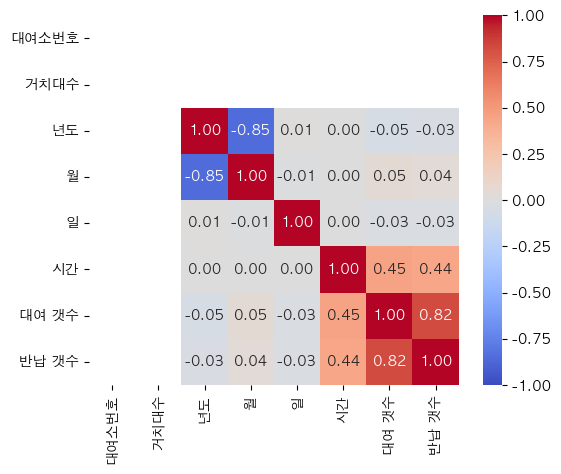

In [254]:
sns.heatmap(jamsil5.corr(numeric_only=True),
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ) 

<Axes: >

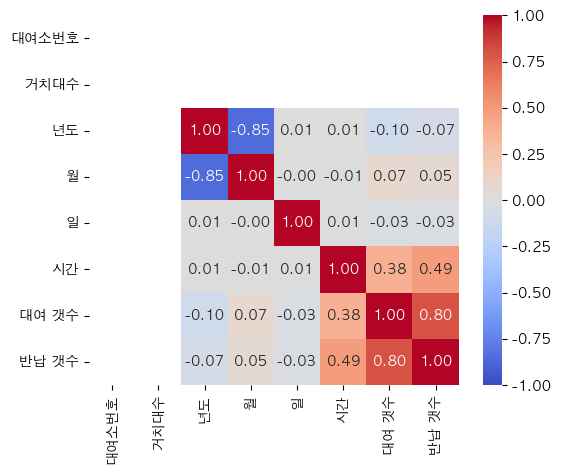

In [255]:
sns.heatmap(songpa4.corr(numeric_only=True),
            annot=True,  # 각 셀에 숫자 표시
            cmap='coolwarm',  # 색상 맵 설정
            vmin=-1, vmax=1,  # 색상 범위 설정
            center=0,  # 0을 중심으로 색상 대칭
            square=True,  # 정사각형 셀
            fmt='.2f', # 소수점 둘째 자리까지 표시
            ) 

In [262]:
jamsil5['대여소번호'].unique()

array([1222])

In [2]:
pd.read_csv('../../data/송파반납대여.csv')

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M),생년,성별,이용자종류,대여대여소ID,반납대여소ID,자전거구분,자치구,반납 자치구
0,SPB-62435,2024-04-01 00:02:22,2637,아시아지하보도 14번 출구,0,2024-04-01 00:02:35,2637.0,아시아지하보도 14번 출구,0,0,0.00,1974,\N,내국인,ST-1864,ST-1864,일반자전거,송파구,송파구
1,SPB-58734,2024-04-01 00:03:25,1295,잠실역 8번출구,0,2024-04-01 00:05:04,4486.0,홈플러스 잠실점,0,1,0.00,2004,M,내국인,ST-1584,ST-2596,일반자전거,송파구,송파구
2,SPB-43679,2024-04-01 00:01:12,4880,송파청소년센터,0,2024-04-01 00:05:08,4893.0,문정법조단지12,0,3,471.33,1997,M,내국인,ST-2957,ST-2972,일반자전거,송파구,송파구
3,SPB-31592,2024-04-01 00:05:20,2621,한성백제역 2번 출구,0,2024-04-01 00:05:30,2621.0,한성백제역 2번 출구,0,0,0.10,2003,M,내국인,ST-1719,ST-1719,일반자전거,송파구,송파구
4,SPB-69307,2024-04-01 00:00:53,4465,건영아파트앞 사거리,0,2024-04-01 00:09:05,4490.0,송파파인타운 10단지 1005동,0,8,1062.41,2000,NaN,내국인,ST-2581,ST-2598,일반자전거,송파구,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5199799,SPB-31629,2023-09-30 23:54:41,1297,석촌호수교차로(동호 팔각정 앞),0,2023-10-01 01:51:37,1290.0,위례송파꿈에그린아파트24단지 앞 성벽 다리 밑,0,116,7865.45,1999,M,내국인,ST-1586,ST-1579,일반자전거,송파구,송파구
5199800,SPB-59100,2023-09-30 23:54:43,4886,배명고등학교 건너편,0,2023-10-01 02:11:43,4886.0,배명고등학교 건너편,0,137,19540.00,1992,\N,내국인,ST-2986,ST-2986,일반자전거,송파구,송파구
5199801,SPB-36304,2023-09-30 17:29:12,1259,방이역 1번출구,0,2023-10-01 06:08:30,1204.0,거여역 3번출구,0,759,8160.87,2008,M,내국인,ST-1078,ST-930,일반자전거,송파구,송파구
5199802,SPB-44686,2023-09-30 22:55:01,1278,송파구청 교차로,0,2023-10-01 08:14:07,4859.0,잠실나루 나들목,0,559,11456.41,1967,\N,내국인,ST-1409,ST-2609,일반자전거,송파구,송파구


In [3]:
count=pd.read_csv('../../data/서울특별시_송파구_인구정보_20240630.csv', encoding='euc-kr')

In [11]:
jamsil_dong=count.iloc[21:,:]

In [14]:
jamsil_dong

,동명,금월인구수,남자수,여자수,세대수,통수,반수,면적(km2),데이터기준일자
21,잠실본동,27831,13287,14544,15974,39,234,0.94,2024-06-30
22,잠실2동,34930,16690,18240,11565,26,156,2.18,2024-06-30
23,잠실3동,33974,16089,17885,11836,33,186,1.49,2024-06-30
24,잠실4동,21222,10234,10988,7231,24,138,1.56,2024-06-30
25,잠실6동,16541,7838,8703,5830,20,103,2.79,2024-06-30
26,잠실7동,9421,4387,5034,3374,10,52,0.60,2024-06-30


In [18]:
public_code=pd.read_excel('../../data/행정동코드_매핑정보_20200325.xlsx')
pucblic_code=public_code.iloc[1:,:]

In [21]:
public_code=public_code[public_code['시군구명'] =='송파구']

In [27]:
public_code=public_code[public_code['행정동명'].str.contains('잠실')]

In [28]:
public_code

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
399,1124071,11710650,서울,송파구,잠실본동
400,1124075,11710690,서울,송파구,잠실4동
401,1124077,11710710,서울,송파구,잠실6동
402,1124078,11710720,서울,송파구,잠실7동
403,1124079,11710670,서울,송파구,잠실2동
404,1124080,11710680,서울,송파구,잠실3동


,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
399,1124071,11710650,서울,송파구,잠실본동
400,1124075,11710690,서울,송파구,잠실4동
401,1124077,11710710,서울,송파구,잠실6동
402,1124078,11710720,서울,송파구,잠실7동
403,1124079,11710670,서울,송파구,잠실2동
404,1124080,11710680,서울,송파구,잠실3동
